In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
#food

ssp1 = pd.read_csv("ssp1_food_con.csv")
ssp2 = pd.read_csv("ssp2_food_con.csv")
ssp3 = pd.read_csv("ssp3_food_con.csv")
ssp4 = pd.read_csv("ssp4_food_con.csv")
ssp5 = pd.read_csv("ssp5_food_con.csv")


def make_new_df(df, ssp):
    df_nonstaple = df[df['sector'] == 'FoodDemand_NonStaples']
    df_staple = df[df['sector'] == 'FoodDemand_Staples']
    df_nonstaple = df_nonstaple.sort_values(by=["year", "region"])
    df_staple = df_staple.sort_values(by=["year", "region"])
    df_staple = df_staple.rename(columns = {"value": "staple"})
    df_nonstaple = df_nonstaple.rename(columns = {"value": "nonstaple"})
    df_staple = df_staple.drop('rundate', axis = 1)
    #df_wide = pd.concat([df_staple, df_nonstaple["nonstaple"]], axis = 1)
    #print(df_wide)
    merged = pd.merge(df_staple, df_nonstaple, how = "outer", on = ["region", "year"])
    merged["ratio"] = merged["nonstaple"] / merged["staple"]
    merged['ssp'] = ssp

    return merged

ssp1_merged = make_new_df(ssp1,1)

ssp2_merged = make_new_df(ssp2,2)

ssp3_merged = make_new_df(ssp3,3)

ssp4_merged = make_new_df(ssp4,4)

ssp5_merged = make_new_df(ssp5,5)


data_food = pd.concat([ssp1_merged, ssp2_merged, ssp3_merged, ssp4_merged, ssp5_merged], axis =0)




In [47]:
#water 

ssp1=pd.read_csv("wat_consum_by_region_ssp1.csv")
ssp1_mun = ssp1[ssp1["input"] == "water_td_muni_C"]
print(ssp1_mun["value"].iloc[1])
ssp1_mun.reset_index(inplace = True)
ssp1_pop = pd.read_csv("pop_by_region_ssp1.csv")
ssp1_pop_1 = ssp1_pop.rename(columns={'value': 'Pop(thousands)'})
ssp1_pop_1.reset_index(inplace = True)
data1 = pd.concat([ssp1_mun, ssp1_pop_1["Pop(thousands)"]], axis = 1)
data1["consum by pop (km3/thousand person)"] = data1["value"]/data1["Pop(thousands)"]
print(data1["consum by pop (km3/thousand person)"].iloc[1])
data1["ssp"] = 1
data1.sort_values(by=["year", "region"])

ssp2=pd.read_csv("wat_consum_by_region_ssp2.csv")
ssp2_mun = ssp2[ssp2["input"] == "water_td_muni_C"]
ssp2_mun.reset_index(inplace = True)
ssp2_pop = pd.read_csv("pop_by_region_ssp2.csv")
ssp2_pop_1 = ssp1_pop.rename(columns={'value': 'Pop(thousands)'})
ssp2_pop_1.reset_index(inplace = True)
data2 = pd.concat([ssp2_mun, ssp2_pop_1["Pop(thousands)"]], axis = 1)
data2["consum by pop (km3/thousand person)"] = data2["value"]/data2["Pop(thousands)"]
data2["ssp"] = 2
data2.sort_values(by=["year", "region"])


ssp3=pd.read_csv("wat_consum_by_region_ssp3.csv")
ssp3_mun = ssp3[ssp3["input"] == "water_td_muni_C"]
ssp3_mun.reset_index(inplace = True)
ssp3_pop = pd.read_csv("pop_by_region_ssp3.csv")
ssp3_pop_1 = ssp3_pop.rename(columns={'value': 'Pop(thousands)'})
ssp3_pop_1.reset_index(inplace = True)
data3 = pd.concat([ssp3_mun, ssp3_pop_1["Pop(thousands)"]], axis = 1)
data3["consum by pop (km3/thousand person)"] = data3["value"]/data3["Pop(thousands)"]
data3["ssp"] = 3
data3.sort_values(by=["year", "region"])


ssp4=pd.read_csv("wat_consum_by_region_ssp4.csv")
ssp4_mun = ssp4[ssp4["input"] == "water_td_muni_C"]
ssp4_mun.reset_index(inplace = True)
ssp4_pop = pd.read_csv("pop_by_region_ssp4.csv")
ssp4_pop_1 = ssp4_pop.rename(columns={'value': 'Pop(thousands)'})
ssp4_pop_1.reset_index(inplace = True)
data4 = pd.concat([ssp4_mun, ssp4_pop_1["Pop(thousands)"]], axis = 1)
data4["consum by pop (km3/thousand person)"] = data4["value"]/data4["Pop(thousands)"]
data4["ssp"] = 4
data4.sort_values(by=["year", "region"])


ssp5=pd.read_csv("wat_consum_by_region_ssp5.csv")
ssp5_mun = ssp5[ssp5["input"] == "water_td_muni_C"]
ssp5_mun.reset_index(inplace = True)
ssp5_pop = pd.read_csv("pop_by_region_ssp5.csv")
ssp5_pop_1 = ssp5_pop.rename(columns={'value': 'Pop(thousands)'})
ssp5_pop_1.reset_index(inplace = True)
data5 = pd.concat([ssp5_mun, ssp5_pop_1["Pop(thousands)"]], axis = 1)
data5["consum by pop (km3/thousand person)"] = data5["value"]/data5["Pop(thousands)"]
data5["ssp"] = 5
data5.sort_values(by=["year", "region"])


data_water = pd.concat([data1, data2, data3, data4, data5], axis =0)


data_water["km3 per person pd"] = data_water['consum by pop (km3/thousand person)'] / (1000 *365)

data_water['L per person pd'] = data_water["km3 per person pd"]*1000000000000

def add_threshold(x):
    if x< 50:
        return 0
    else:
        return 1

data_water['Threshold'] = data_water["L per person pd"].apply(add_threshold)
data_water['Ratio of Water/50 L pppd'] = data_water["L per person pd"] / 50


0.27621
1.8971379118501577e-06


In [48]:
#now can we plot both 
data_water_100= data_water[data_water['year'] == 2100]
data_food_100 = data_food[data_food["year"] == 2100]
joint = pd.merge(data_water, data_food, how = "outer")
joint_100 = pd.merge(data_water_100, data_food_100, how = "outer")
print(joint)
print(joint.columns)
print(joint_100)
print(joint_100.columns)



      index  Unnamed: 0 Units   scenario          region            input  \
0       241         242  km^3  Reference  Africa_Eastern  water_td_muni_C   
1       242         243  km^3  Reference  Africa_Eastern  water_td_muni_C   
2       243         244  km^3  Reference  Africa_Eastern  water_td_muni_C   
3       244         245  km^3  Reference  Africa_Eastern  water_td_muni_C   
4       245         246  km^3  Reference  Africa_Eastern  water_td_muni_C   
...     ...         ...   ...        ...             ...              ...   
3515  10941       10942  km^3  Reference             USA  water_td_muni_C   
3516  10942       10943  km^3  Reference             USA  water_td_muni_C   
3517  10943       10944  km^3  Reference             USA  water_td_muni_C   
3518  10944       10945  km^3  Reference             USA  water_td_muni_C   
3519  10945       10946  km^3  Reference             USA  water_td_muni_C   

      year      value              rundate  Pop(thousands)  ...  \
0     19

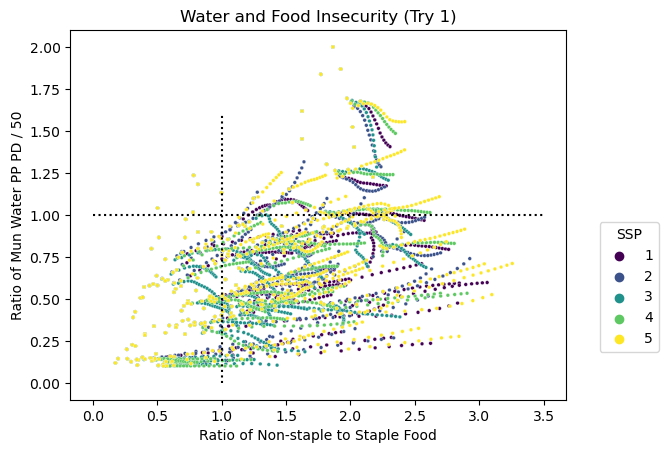

In [49]:
sns.scatterplot(data=joint, x= 'ratio', y = 'Ratio of Water/50 L pppd', hue = 'ssp', palette = 'viridis', s = 7)
plt.title('Water and Food Insecurity (Try 1)')
plt.ylabel("Ratio of Mun Water PP PD / 50")
plt.xlabel("Ratio of Non-staple to Staple Food")
plt.vlines(1, 0, 1.6, color = "black", linestyle = "dotted")
plt.hlines(1, 0, 3.5, color = "black", linestyle = "dotted")
plt.legend(bbox_to_anchor = (1.2, 0.5), title = "SSP")

In [50]:
#can we find where and when these often align?
    #maybe a histogram???
def apply_water_threshold(x):
    if x < 50:
        return 1
    else:
        return 0

def apply_food_threshold(x):
    if x < 1:
        return 1
    else:
        return 0 
        
    

data_water["Threshold Water"] = data_water["L per person pd"].apply(apply_water_threshold)
data_food["Threshold Food"] = data_food["ratio"].apply(apply_food_threshold)
joint_limited = pd.merge(data_water, data_food, how = "outer")
print(joint_limited)
joint_limited["product thresh"] = joint_limited["Threshold Water"] * joint_limited["Threshold Food"]
joint_limited = joint_limited[joint_limited["product thresh"] == 1]
print(joint_limited)


      index  Unnamed: 0 Units   scenario          region            input  \
0       241         242  km^3  Reference  Africa_Eastern  water_td_muni_C   
1       242         243  km^3  Reference  Africa_Eastern  water_td_muni_C   
2       243         244  km^3  Reference  Africa_Eastern  water_td_muni_C   
3       244         245  km^3  Reference  Africa_Eastern  water_td_muni_C   
4       245         246  km^3  Reference  Africa_Eastern  water_td_muni_C   
...     ...         ...   ...        ...             ...              ...   
3515  10941       10942  km^3  Reference             USA  water_td_muni_C   
3516  10942       10943  km^3  Reference             USA  water_td_muni_C   
3517  10943       10944  km^3  Reference             USA  water_td_muni_C   
3518  10944       10945  km^3  Reference             USA  water_td_muni_C   
3519  10945       10946  km^3  Reference             USA  water_td_muni_C   

      year      value              rundate  Pop(thousands)  ...  \
0     19

C:\Users\cknox\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'Africa_Eastern'),
  Text(1, 0, 'Africa_Northern'),
  Text(2, 0, 'Africa_Southern'),
  Text(3, 0, 'Africa_Western'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Central America and Caribbean'),
  Text(6, 0, 'Central Asia'),
  Text(7, 0, 'China'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Europe_Eastern'),
  Text(10, 0, 'Europe_Non_EU'),
  Text(11, 0, 'India'),
  Text(12, 0, 'Indonesia'),
  Text(13, 0, 'Japan'),
  Text(14, 0, 'Mexico'),
  Text(15, 0, 'Middle East'),
  Text(16, 0, 'Pakistan'),
  Text(17, 0, 'Russia'),
  Text(18, 0, 'South Africa'),
  Text(19, 0, 'South America_Northern'),
  Text(20, 0, 'South America_Southern'),
  Text(21, 0, 'South Asia'),
  Text(22, 0, 'South Korea'),
  Text(23, 0, 'Southeast Asia')])

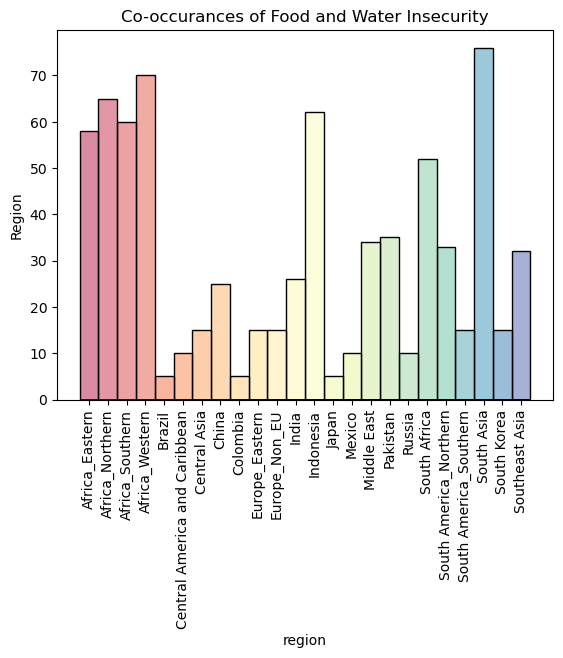

In [51]:
sns.histplot(data=joint_limited, x="region", hue = 'region', palette = "Spectral", legend = False)
plt.title("Co-occurances of Food and Water Insecurity")
plt.ylabel("Region")
#plt.legend(bbox_to_anchor = (0.5, 1.1))
plt.xticks(rotation = 90)

In [44]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/90/37/08e416c9915dcf7d53deb0fbdb702266902c584617dfa6e6c84fb2fc6ee3/geopandas-0.14.3-py3-none-any.whl.metadata
  Using cached geopandas-0.14.3-py3-none-any.whl.metadata (1.5 kB)
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/ba/f40c12e2a6b4a106ab16b1adfee2bf0aa6c27aaa72f928bf52b71734f9d8/fiona-1.9.6-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 666.1 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files

    key  reg_id                           reg_nm  \
0     1       1                              USA   
1     2       2                   Africa_Eastern   
2     3       3                  Africa_Northern   
3     4       4                  Africa_Southern   
4     5       5                   Africa_Western   
5     6       6                     Australia_NZ   
6     7       7                           Brazil   
7     8       8                           Canada   
8     9       9    Central America and Caribbean   
9    10      10                     Central Asia   
10   11      11                            China   
11   12      12                            EU-12   
12   13      13                            EU-15   
13   14      14                   Europe_Eastern   
14   15      15                    Europe_Non_EU   
15   16      16  European Free Trade Association   
16   17      17                            India   
17   18      18                        Indonesia   
18   19     

C:\Users\cknox\AppData\Local\Temp\ipykernel_28660\4006603639.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


Text(0.5, 1.0, 'Co-Occurances of Failing to Meet Food and Water Metrics')

<Figure size 1000x600 with 0 Axes>

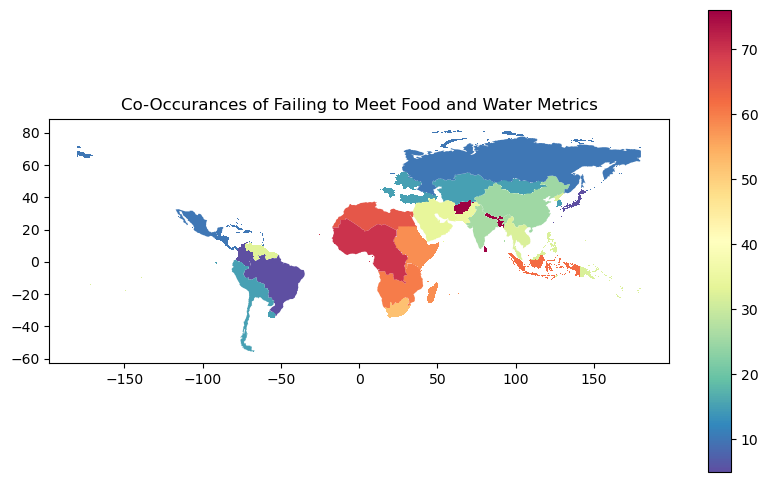

In [76]:
import geopandas

gdf = geopandas.read_file("region_boundaries_moirai_combined_3p1_0p5arcmin.shp")
print(gdf)
gdf = gdf.set_index("reg_nm")
gdf["area"] = gdf.area
gdf["boundary"] = gdf.boundary

#"product thresh

#get data that sums joint_limited

#my dataframe of csv ouptuts that I've been using above is joint limited
joint_limited_group = joint_limited.groupby(["region"]).sum()
#product thresh is a column I created that indiciates simulataneous water and land scarcity
gdf["ratio_occurances"] = joint_limited_group["product thresh"]
#separate column creation for water alone
gdf["threshold water"] = joint_limited_group["Threshold Water"]
#and for land alone
gdf["threshold food"] = joint_limited_group["Threshold Food"]
plt.figure(figsize = (10,6))
gdf.plot("ratio_occurances", legend=True, figsize = (10,6), cmap = "Spectral_r")

plt.title("Co-Occurances of Failing to Meet Food and Water Metrics")



In [ ]:
#WHY AM I LOSING THE USA?????